In [1]:
import pandas as pd
import numpy as np
import random
from collections import Counter
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [5]:
def month_to_npl(x):    
    if x['is_npl']==0:
        return None
    else :
        return x['month_from_open']

# 1. Ekstrak Data

In [61]:
df = pd.read_csv('contoh_raw_data.csv', parse_dates=['open_date','posisi_data','jatuh_tempo'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   open_date        120000 non-null  datetime64[ns]
 1   nama_pinjaman    120000 non-null  object        
 2   status           120000 non-null  int64         
 3   posisi_data      120000 non-null  datetime64[ns]
 4   jatuh_tempo      120000 non-null  datetime64[ns]
 5   month_from_open  120000 non-null  int64         
dtypes: datetime64[ns](3), int64(2), object(1)
memory usage: 5.5+ MB


# 2. Add DPD

In [63]:
df['dpd'] = (df['posisi_data'] - df['jatuh_tempo']).dt.days
df.sample(3)

,open_date,nama_pinjaman,status,posisi_data,jatuh_tempo,month_from_open,dpd
36589,2015-01-30,PINJAMAN6589,1,2015-09-01,2015-09-30,8,-29
7467,2015-01-22,PINJAMAN7467,1,2015-06-01,2015-06-22,5,-21
55510,2015-01-06,PINJAMAN5510,1,2015-11-01,2015-11-06,10,-5


# 3. Add is_npl

In [64]:
df['is_npl'] = df.dpd.apply(lambda x : 1 if x>=91 else 0)
df.sample(10)

,open_date,nama_pinjaman,status,posisi_data,jatuh_tempo,month_from_open,dpd,is_npl
32065,2015-01-04,PINJAMAN2065,1,2015-09-01,2015-09-04,8,-3,0
54976,2015-01-21,PINJAMAN4976,1,2015-11-01,2015-11-21,10,-20,0
92135,2015-01-14,PINJAMAN2135,1,2016-03-01,2016-03-14,14,-13,0
15336,2015-01-12,PINJAMAN5336,1,2015-07-01,2015-07-12,6,-11,0
113659,2015-01-17,PINJAMAN3659,1,2016-05-01,2016-05-17,16,-16,0
96457,2015-01-10,PINJAMAN6457,1,2016-03-01,2016-03-10,14,-9,0
96893,2015-01-01,PINJAMAN6893,1,2016-03-01,2016-03-01,14,0,0
36520,2015-01-25,PINJAMAN6520,1,2015-09-01,2015-09-25,8,-24,0
88418,2015-01-20,PINJAMAN8418,1,2016-02-01,2016-02-20,13,-19,0
118959,2015-01-24,PINJAMAN8959,1,2016-05-01,2016-05-24,16,-23,0


In [42]:
df[df.is_npl>0].sample(3)

,open_date,nama_pinjaman,status,posisi_data,jatuh_tempo,dpd,is_npl
24477,2015-01-09,PINJAMAN4477,1,2015-08-01,2015-04-28,95,1
4965,2015-01-10,PINJAMAN4965,1,2015-06-01,2015-02-19,102,1
243,2015-01-02,PINJAMAN0243,1,2015-06-01,2015-02-18,103,1


# 4. Month to NPL (mob)

In [66]:
df['month_to_npl'] =  df.apply(month_to_npl, axis=1)

In [68]:
df.sample(7)

,open_date,nama_pinjaman,status,posisi_data,jatuh_tempo,month_from_open,dpd,is_npl,month_to_npl
34286,2015-01-09,PINJAMAN4286,1,2015-09-01,2015-09-09,8,-8,0,NaN
4308,2015-01-22,PINJAMAN4308,1,2015-06-01,2015-06-22,5,-21,0,NaN
80670,2015-01-10,PINJAMAN0670,1,2016-02-01,2016-02-10,13,-9,0,NaN
58396,2015-01-18,PINJAMAN8396,1,2015-11-01,2015-11-18,10,-17,0,NaN
15843,2015-01-18,PINJAMAN5843,1,2015-07-01,2015-07-18,6,-17,0,NaN
115849,2015-01-04,PINJAMAN5849,1,2016-05-01,2016-05-04,16,-3,0,NaN
88560,2015-01-04,PINJAMAN8560,1,2016-02-01,2016-02-04,13,-3,0,NaN


In [69]:
df[df.month_to_npl>2].sample(3)

,open_date,nama_pinjaman,status,posisi_data,jatuh_tempo,month_from_open,dpd,is_npl,month_to_npl
11121,2015-01-25,PINJAMAN1121,1,2015-07-01,2015-03-06,6,117,1,6.0
2959,2015-01-06,PINJAMAN2959,1,2015-06-01,2015-03-02,5,91,1,5.0
21520,2015-01-15,PINJAMAN1520,1,2015-08-01,2015-04-24,7,99,1,7.0


# 5. Data per Pinjaman

In [74]:
time_window = 'bulan_realisasi'
df['bulan_realisasi'] = df['open_date'].apply(lambda x : str(x)[:7])

In [77]:
dataset_per_acctno = df.groupby([time_window,"nama_pinjaman"])\
                       .agg(month_to_npl=('month_to_npl', 'min'), is_npl=('is_npl', 'max'),).reset_index()

In [80]:
# dataset_per_acctno[dataset_per_acctno['month_to_npl']>0]

In [107]:
dataset_group = dataset_per_acctno.groupby([time_window,"month_to_npl"])\
                                  .agg({"is_npl": np.sum}).reset_index()\
                                  .sort_values(by=[time_window,'month_to_npl'])
dataset_group['jumlah_pinjaman'] = n
dataset_group.rename(columns={'is_npl':'jumlah_npl'}, inplace=True)

dataset_group['persentase_npl'] = dataset_group['jumlah_npl']/dataset_group['jumlah_pinjaman']
dataset_group['cumsum_persentase_npl'] = dataset_group['persentase_npl'].cumsum(axis=0)

In [108]:
dataset_group

,bulan_realisasi,month_to_npl,jumlah_npl,jumlah_pinjaman,persentase_npl,cumsum_persentase_npl
0,2015-01,4.0,3,10000,0.0003,0.0003
1,2015-01,5.0,202,10000,0.0202,0.0205
2,2015-01,6.0,97,10000,0.0097,0.0302
3,2015-01,7.0,99,10000,0.0099,0.0401
4,2015-01,8.0,49,10000,0.0049,0.0450
5,2015-01,9.0,10,10000,0.0010,0.0460
6,2015-01,10.0,10,10000,0.0010,0.0470
7,2015-01,11.0,10,10000,0.0010,0.0480
8,2015-01,12.0,10,10000,0.0010,0.0490
9,2015-01,13.0,10,10000,0.0010,0.0500


# 6. Vintage Analysis

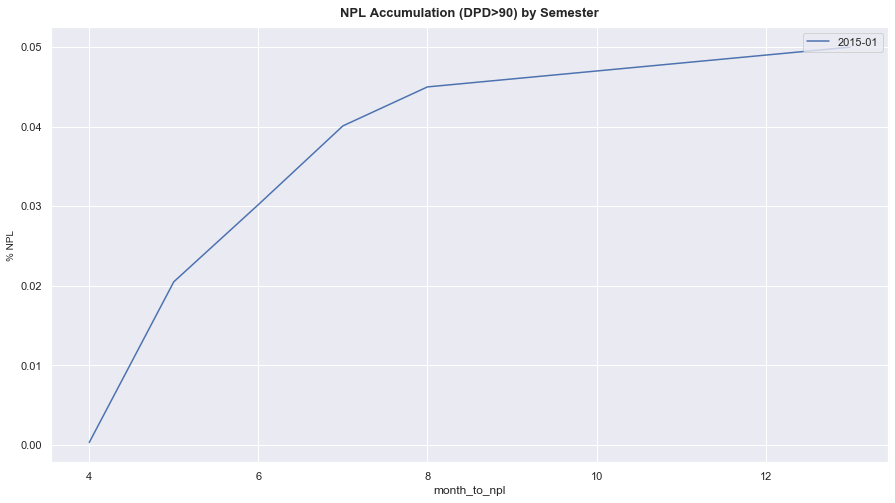

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,8))
ax=sns.lineplot(data=dataset_group, x='month_to_npl', y='cumsum_persentase_npl',hue=time_window)
sns.set(font_scale=1)
plt.legend(loc='upper right')
plt.ylabel('% NPL', size=10)
plt.title('NPL Accumulation (DPD>90) by Semester',  pad=11, fontsize=13, fontweight='semibold')
plt.show()